Importing the Libraries

In [118]:
# Importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix, precision_score, precision_recall_curve
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Set options for pandas
pd.options.display.max_columns = 100
pd.options.display.max_rows = 100

# Ignore warnings
warnings.filterwarnings('ignore')

# Enable inline plotting
%matplotlib inline

Importing the Dataset

In [119]:
#Reading the Dataset
df = pd.read_csv('D:/Lead+Scoring+Case+Study/Lead Scoring Assignment/Leads.csv')

Reading the Dataset

In [120]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [121]:
df.tail()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
9235,19d6451e-fcd6-407c-b83b-48e1af805ea9,579564,Landing Page Submission,Direct Traffic,Yes,No,1,8.0,1845,2.67,Email Marked Spam,Saudi Arabia,IT Projects Management,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,High in Relevance,No,No,Potential Lead,Mumbai,02.Medium,01.High,15.0,17.0,No,No,Email Marked Spam
9236,82a7005b-7196-4d56-95ce-a79f937a158d,579546,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.00,SMS Sent,India,Media and Advertising,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,wrong number given,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,19.0,No,Yes,SMS Sent
9237,aac550fe-a586-452d-8d3c-f1b62c94e02c,579545,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.00,SMS Sent,India,Business Administration,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,invalid number,Not Sure,No,No,Potential Lead,Mumbai,02.Medium,01.High,13.0,20.0,No,Yes,SMS Sent
9238,5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9,579538,Landing Page Submission,Google,No,No,1,3.0,499,3.00,SMS Sent,India,Human Resource Management,Online Search,NaN,NaN,No,No,No,No,No,No,No,No,NaN,NaN,No,No,NaN,Other Metro Cities,02.Medium,02.Medium,15.0,16.0,No,No,SMS Sent
9239,571b5c8e-a5b2-4d57-8574-f2ffb06fdeff,579533,Landing Page Submission,Direct Traffic,No,No,1,6.0,1279,3.00,SMS Sent,Bangladesh,Supply Chain Management,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Other Cities,02.Medium,01.High,15.0,18.0,No,Yes,Modified


In [122]:
#Shape of the Dataset
df.shape

(9240, 37)

In [123]:
#Summary of the Dataset
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [124]:
#Checking the types of data present in the Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [125]:
df.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [126]:
#Replacing the space between the column names with an underscore
df.columns = df.columns.str.replace(' ','_')

In [127]:
df.columns

Index(['Prospect_ID', 'Lead_Number', 'Lead_Origin', 'Lead_Source',
       'Do_Not_Email', 'Do_Not_Call', 'Converted', 'TotalVisits',
       'Total_Time_Spent_on_Website', 'Page_Views_Per_Visit', 'Last_Activity',
       'Country', 'Specialization', 'How_did_you_hear_about_X_Education',
       'What_is_your_current_occupation',
       'What_matters_most_to_you_in_choosing_a_course', 'Search', 'Magazine',
       'Newspaper_Article', 'X_Education_Forums', 'Newspaper',
       'Digital_Advertisement', 'Through_Recommendations',
       'Receive_More_Updates_About_Our_Courses', 'Tags', 'Lead_Quality',
       'Update_me_on_Supply_Chain_Content', 'Get_updates_on_DM_Content',
       'Lead_Profile', 'City', 'Asymmetrique_Activity_Index',
       'Asymmetrique_Profile_Index', 'Asymmetrique_Activity_Score',
       'Asymmetrique_Profile_Score',
       'I_agree_to_pay_the_amount_through_cheque',
       'A_free_copy_of_Mastering_The_Interview', 'Last_Notable_Activity'],
      dtype='object')

In [128]:
#Checking for Duplicate values
df.duplicated().sum()

0

In [129]:
#Checking for Null Values
df.isnull().sum()

Prospect_ID                                         0
Lead_Number                                         0
Lead_Origin                                         0
Lead_Source                                        36
Do_Not_Email                                        0
Do_Not_Call                                         0
Converted                                           0
TotalVisits                                       137
Total_Time_Spent_on_Website                         0
Page_Views_Per_Visit                              137
Last_Activity                                     103
Country                                          2461
Specialization                                   1438
How_did_you_hear_about_X_Education               2207
What_is_your_current_occupation                  2690
What_matters_most_to_you_in_choosing_a_course    2709
Search                                              0
Magazine                                            0
Newspaper_Article           

In [130]:
#Percentage of missing values in the Dataset
round((df.isnull().sum()/df.shape[0])*100, 2)

Prospect_ID                                       0.00
Lead_Number                                       0.00
Lead_Origin                                       0.00
Lead_Source                                       0.39
Do_Not_Email                                      0.00
Do_Not_Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total_Time_Spent_on_Website                       0.00
Page_Views_Per_Visit                              1.48
Last_Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How_did_you_hear_about_X_Education               23.89
What_is_your_current_occupation                  29.11
What_matters_most_to_you_in_choosing_a_course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper_

Data Preparation

In [131]:
#Dropping columns with more than 45% of Null Values
df = df.drop(df.loc[:,list(round((df.isnull().sum()/df.shape[0])*100,2)>45)].columns, axis = 1) 

In [132]:
round((df.isnull().sum()/df.shape[0])*100, 2)

Prospect_ID                                       0.00
Lead_Number                                       0.00
Lead_Origin                                       0.00
Lead_Source                                       0.39
Do_Not_Email                                      0.00
Do_Not_Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total_Time_Spent_on_Website                       0.00
Page_Views_Per_Visit                              1.48
Last_Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How_did_you_hear_about_X_Education               23.89
What_is_your_current_occupation                  29.11
What_matters_most_to_you_in_choosing_a_course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper_

Handling Missing Values

In [133]:
# Calculate the median of the 'TotalVisits' column
median_value = df['TotalVisits'].median()

# Fill missing values with the calculated median and convert to integer
df['TotalVisits'] = df['TotalVisits'].fillna(median_value).astype(int)

In [134]:
# Calculate the median of the 'Page_Views_Per_Visit' column
median_value = df['Page_Views_Per_Visit'].median()

# Fill missing values with the calculated median
df['Page_Views_Per_Visit'].fillna(median_value, inplace=True)

In [135]:
# Generate summary statistics for the 'Country' column
df['Country'].describe()

count      6779
unique       38
top       India
freq       6492
Name: Country, dtype: object

In [136]:
# Calculate the percentage distribution of values in the 'Country' column, including missing values

round(df['Country'].value_counts(normalize=True, dropna=False) * 100, 2)

India                   70.26
NaN                     26.63
United States            0.75
United Arab Emirates     0.57
Singapore                0.26
Saudi Arabia             0.23
United Kingdom           0.16
Australia                0.14
Qatar                    0.11
Bahrain                  0.08
Hong Kong                0.08
Oman                     0.06
France                   0.06
unknown                  0.05
Kuwait                   0.04
South Africa             0.04
Canada                   0.04
Nigeria                  0.04
Germany                  0.04
Sweden                   0.03
Philippines              0.02
Uganda                   0.02
Italy                    0.02
Bangladesh               0.02
Netherlands              0.02
Asia/Pacific Region      0.02
China                    0.02
Belgium                  0.02
Ghana                    0.02
Kenya                    0.01
Sri Lanka                0.01
Tanzania                 0.01
Malaysia                 0.01
Liberia   

In [137]:
# Replace missing (NaN) values in the 'Country' column with 'India'
# More than 90% of the values in the 'Country' column is 'India' so it is safe to impute the values 

df['Country'] = df['Country'].replace(np.nan, 'India')

In [138]:
# Identify columns with values containing 'Select' in columns of object data type (typically, categorical or string data)
select_columns = [col for col in df.select_dtypes(include='object')
                  if df[col].str.contains('Select', na=False).any()]

# Print the list of columns that meet the condition
print(select_columns)

['Specialization', 'How_did_you_hear_about_X_Education', 'Lead_Profile', 'City']


In [139]:
# Generate summary statistics for the 'Specialization' column
df['Specialization'].describe()

count       7802
unique        19
top       Select
freq        1942
Name: Specialization, dtype: object

In [140]:
# Calculate the percentage distribution of values in the 'Specialization' column, including missing values
round(df['Specialization'].value_counts(normalize = True, dropna = False)*100, 2)  

Select                               21.02
NaN                                  15.56
Finance Management                   10.56
Human Resource Management             9.18
Marketing Management                  9.07
Operations Management                 5.44
Business Administration               4.36
IT Projects Management                3.96
Supply Chain Management               3.78
Banking, Investment And Insurance     3.66
Travel and Tourism                    2.20
Media and Advertising                 2.20
International Business                1.93
Healthcare Management                 1.72
Hospitality Management                1.23
E-COMMERCE                            1.21
Retail Management                     1.08
Rural and Agribusiness                0.79
E-Business                            0.62
Services Excellence                   0.43
Name: Specialization, dtype: float64

In [141]:
# List of columns where 'Select' values should be replaced with NaN
select_col = ['Specialization', 'How_did_you_hear_about_X_Education', 'Lead_Profile', 'City']

# Replace 'Select' values with NaN in the specified columns
df[select_col] = df[select_col].replace('Select', np.NaN)

In [142]:
df['Specialization'].describe()

count                   5860
unique                    18
top       Finance Management
freq                     976
Name: Specialization, dtype: object

In [143]:
round(df['Specialization'].value_counts(normalize= True, dropna= False)*100, 2)

NaN                                  36.58
Finance Management                   10.56
Human Resource Management             9.18
Marketing Management                  9.07
Operations Management                 5.44
Business Administration               4.36
IT Projects Management                3.96
Supply Chain Management               3.78
Banking, Investment And Insurance     3.66
Travel and Tourism                    2.20
Media and Advertising                 2.20
International Business                1.93
Healthcare Management                 1.72
Hospitality Management                1.23
E-COMMERCE                            1.21
Retail Management                     1.08
Rural and Agribusiness                0.79
E-Business                            0.62
Services Excellence                   0.43
Name: Specialization, dtype: float64

In [144]:
# Replace missing (NaN) values in the 'Specialization' column with 'Others'

df['Specialization'] = df['Specialization'].replace(np.NaN, 'Others')

In [145]:
# Generate summary statistics for the 'City' column
df['City'].describe()

count       5571
unique         6
top       Mumbai
freq        3222
Name: City, dtype: object

In [146]:
# Calculate the percentage distribution of values in the 'City' column, including missing values
round(df['City'].value_counts(normalize= True, dropna= False)*100, 2)

NaN                            39.71
Mumbai                         34.87
Thane & Outskirts               8.14
Other Cities                    7.42
Other Cities of Maharashtra     4.95
Other Metro Cities              4.11
Tier II Cities                  0.80
Name: City, dtype: float64

In [147]:
# Replace missing (NaN) values in the 'City' column with 'Mumbai'
# Majority of the values in the 'City' column is 'Mumbai' so it is safe to impute the values 
df['City'] = df['City'].replace(np.nan, 'Mumbai')

In [148]:
# Generate summary statistics for the 'What_is_your_current_occupation' column
df['What_is_your_current_occupation'].describe()

count           6550
unique             6
top       Unemployed
freq            5600
Name: What_is_your_current_occupation, dtype: object

In [149]:
# Calculate the percentage distribution of values in the 'What_is_your_current_occupation' column, including missing values 
round(df['What_is_your_current_occupation'].value_counts(normalize= True, dropna= False)*100, 2)

Unemployed              60.61
NaN                     29.11
Working Professional     7.64
Student                  2.27
Other                    0.17
Housewife                0.11
Businessman              0.09
Name: What_is_your_current_occupation, dtype: float64

In [150]:
# Replace missing (NaN) values in the 'What_is_your_current_occupation' column with 'Unemployed'
# More than 85% data is of "Unemployed" and hence it is safer to impute NULLS with this value
df['What_is_your_current_occupation'] = df['What_is_your_current_occupation'].replace(np.nan, 'Unemployed')

In [151]:
# Generate summary statistics for the 'What_matters_most_to_you_in_choosing_a_course' column
df['What_matters_most_to_you_in_choosing_a_course'].describe()

count                        6531
unique                          3
top       Better Career Prospects
freq                         6528
Name: What_matters_most_to_you_in_choosing_a_course, dtype: object

In [152]:
# Calculate the percentage distribution of values in the 'What_matters_most_to_you_in_choosing_a_course' column, including missing values
round(df['What_matters_most_to_you_in_choosing_a_course'].value_counts(normalize= True, dropna= False)*100, 2)

Better Career Prospects      70.65
NaN                          29.32
Flexibility & Convenience     0.02
Other                         0.01
Name: What_matters_most_to_you_in_choosing_a_course, dtype: float64

In [153]:
# Replace missing (NaN) values in the 'What_matters_most_to_you_in_choosing_a_course' column with 'Better Career Prospects'
# More than 99% data is of "Better Career Prospects" and hence it is safer to impute NULLS with this value
df['What_matters_most_to_you_in_choosing_a_course'] = df['What_matters_most_to_you_in_choosing_a_course'].replace(np.nan, 'Better Career Prospects')

In [154]:
# Generate summary statistics for the 'What_is_your_current_occupation' column
df['What_is_your_current_occupation'].describe()

count           9240
unique             6
top       Unemployed
freq            8290
Name: What_is_your_current_occupation, dtype: object

In [155]:
# Calculate the percentage distribution of values in the 'What_is_your_current_occupation' column, including missing values
round(df['What_is_your_current_occupation'].value_counts(normalize= True, dropna= False)*100, 2)

Unemployed              89.72
Working Professional     7.64
Student                  2.27
Other                    0.17
Housewife                0.11
Businessman              0.09
Name: What_is_your_current_occupation, dtype: float64

In [156]:
# Replace missing (NaN) values in the 'What_is_your_current_occupation' column with 'Unemployed'
# More than 80% of the data is of the value 'Unemployed' so it is safe to impute the NaN values to Unemployed
df['What_is_your_current_occupation'] = df['What_is_your_current_occupation'].replace(np.NaN, 'Unemployed')

In [157]:
# Generate summary statistics for the 'Tags' column
df['Tags'].describe()

count                                    5887
unique                                     26
top       Will revert after reading the email
freq                                     2072
Name: Tags, dtype: object

In [158]:
# Calculate the percentage distribution of values in the 'Tags' column, including missing values
round(df['Tags'].value_counts(normalize= True, dropna= False)*100, 2)

NaN                                                  36.29
Will revert after reading the email                  22.42
Ringing                                              13.02
Interested in other courses                           5.55
Already a student                                     5.03
Closed by Horizzon                                    3.87
switched off                                          2.60
Busy                                                  2.01
Lost to EINS                                          1.89
Not doing further education                           1.57
Interested  in full time MBA                          1.27
Graduation in progress                                1.20
invalid number                                        0.90
Diploma holder (Not Eligible)                         0.68
wrong number given                                    0.51
opp hangup                                            0.36
number not provided                                   0.

In [159]:
# Replace missing (NaN) values in the 'Tags' column with 'Will revert after reading the email'
# For Tags column, more than 30% data is for "Will revert after reading the email" and hence we can impute NULLS with Will revert after reading the email
df['Tags'] = df['Tags'].replace(np.nan, 'Will revert after reading the email')

In [160]:
round((df.isnull().sum()/df.shape[0])*100, 2)

Prospect_ID                                       0.00
Lead_Number                                       0.00
Lead_Origin                                       0.00
Lead_Source                                       0.39
Do_Not_Email                                      0.00
Do_Not_Call                                       0.00
Converted                                         0.00
TotalVisits                                       0.00
Total_Time_Spent_on_Website                       0.00
Page_Views_Per_Visit                              0.00
Last_Activity                                     1.11
Country                                           0.00
Specialization                                    0.00
How_did_you_hear_about_X_Education               78.46
What_is_your_current_occupation                   0.00
What_matters_most_to_you_in_choosing_a_course     0.00
Search                                            0.00
Magazine                                          0.00
Newspaper_

In [161]:
# Drop the columns 'Lead_Profile' and 'How_did_you_hear_about_X_Education' from the DataFrame

df.drop(['Lead_Profile', 'How_did_you_hear_about_X_Education'], axis = 1, inplace = True)

In [162]:
df.head()

,Prospect_ID,Lead_Number,Lead_Origin,Lead_Source,Do_Not_Email,Do_Not_Call,Converted,TotalVisits,Total_Time_Spent_on_Website,Page_Views_Per_Visit,Last_Activity,Country,Specialization,What_is_your_current_occupation,What_matters_most_to_you_in_choosing_a_course,Search,Magazine,Newspaper_Article,X_Education_Forums,Newspaper,Digital_Advertisement,Through_Recommendations,Receive_More_Updates_About_Our_Courses,Tags,Update_me_on_Supply_Chain_Content,Get_updates_on_DM_Content,City,I_agree_to_pay_the_amount_through_cheque,A_free_copy_of_Mastering_The_Interview,Last_Notable_Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0,0,0.0,Page Visited on Website,India,Others,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,No,No,Mumbai,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5,674,2.5,Email Opened,India,Others,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,No,No,Mumbai,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2,1532,2.0,Email Opened,India,Business Administration,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,Mumbai,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1,305,1.0,Unreachable,India,Media and Advertising,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,No,No,Mumbai,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2,1428,1.0,Converted to Lead,India,Others,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,Mumbai,No,No,Modified


Exploratory Data Analysis

In [163]:
#The 'Converted' column is the target variable
df['Converted'].value_counts(normalize= True)

0    0.61461
1    0.38539
Name: Converted, dtype: float64

In [164]:
# Replace 'google' with 'Google' in the 'Lead_Source' column

df['Lead_Source'] = df['Lead_Source'].replace(['google'], 'Google')


# Replace multiple values with 'Others' in the 'Lead_Source' column

df['Lead_Source'] = df['Lead_Source'].replace(['Click2call', 'Live Chat', 'NC_EDM', 'PAy per Click Ads',
                                                'Press_Release', 'Social Media', 'WeLearn', 'bing',
                                                  'blog', 'testone', 'welearnblog_Home',
                                                    'youtubechannel'], 'Others')

In [165]:
# Define a function to calculate and print a conversion summary for a specified column
def conversion_summary(df, col):
    # Group the DataFrame by the specified column and 'Converted' status, and count the 'Lead_Number'
    grouped = df.groupby([col, 'Converted'])['Lead_Number'].count().unstack(fill_value=0)
    
    # Calculate the conversion percentage and round it to two decimal places
    grouped['Conversion(%)'] = (grouped[1] / (grouped[0] + grouped[1])).round(2) * 100
    
    # Sort the summary by conversion percentage in descending order
    sorted_summary = grouped.sort_values(by='Conversion(%)', ascending=False)
    
    # Print the sorted conversion summary
    print(sorted_summary)

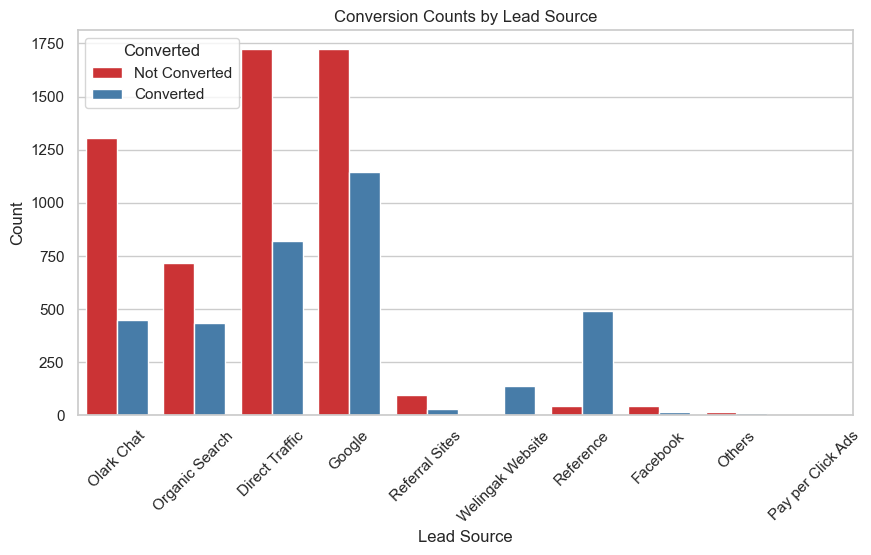

In [166]:
# Create a countplot to visualize conversion counts by 'Lead_Source' with 'Converted' as hue

sns.set(style="whitegrid")


plt.figure(figsize=(10, 5))
ax = sns.countplot(x="Lead_Source", hue="Converted", data=df, palette="Set1")


ax.set_title("Conversion Counts by Lead Source")
ax.set_xlabel("Lead Source")
ax.set_ylabel("Count")
ax.legend(title="Converted", labels=["Not Converted", "Converted"])

# Rotate x-axis labels for better readability
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

plt.show()

In [167]:
# Call the 'conversion_summary' function to calculate and print a conversion summary for the 'Lead_Source' column
conversion_summary(df, 'Lead_Source')

Converted             0     1  Conversion(%)
Lead_Source                                 
Welingak Website      2   140           99.0
Reference            44   490           92.0
Others               13     9           41.0
Google             1726  1147           40.0
Organic Search      718   436           38.0
Direct Traffic     1725   818           32.0
Olark Chat         1307   448           26.0
Referral Sites       94    31           25.0
Facebook             42    13           24.0
Pay per Click Ads     1     0            0.0


The leads from Google and Direct Traffic 
are the highest of the count.

The highest conversion rate of the leads are from Reference and Welingak Website.

Welingak Website has a conversion rate of 99%

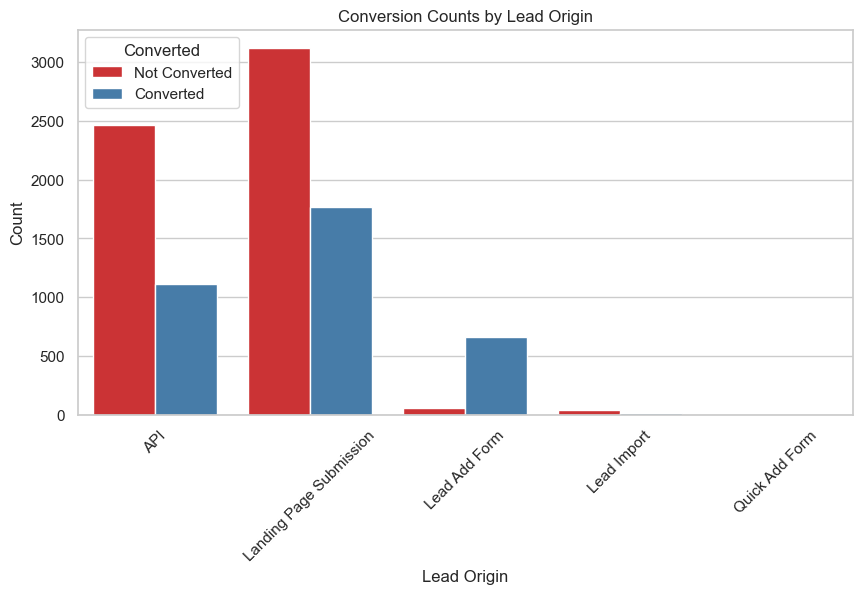

In [168]:
# Create a countplot to visualize conversion counts by 'Lead_Source' with 'Converted' as hue

sns.set(style="whitegrid")


plt.figure(figsize=(10, 5))
ax = sns.countplot(x="Lead_Origin", hue="Converted", data=df, palette="Set1")


ax.set_title("Conversion Counts by Lead Origin")
ax.set_xlabel("Lead Origin")
ax.set_ylabel("Count")
ax.legend(title="Converted", labels=["Not Converted", "Converted"])

# Rotate x-axis labels for better readability
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

plt.show()

In [169]:
# Call the 'conversion_summary' function to calculate and print a conversion summary for the 'Lead_Origin' column

conversion_summary(df, 'Lead_Origin')

Converted                   0     1  Conversion(%)
Lead_Origin                                       
Quick Add Form              0     1          100.0
Lead Add Form              54   664           92.0
Landing Page Submission  3118  1768           36.0
API                      2465  1115           31.0
Lead Import                42    13           24.0


Lead Add Form has a conversion rate of 92%

API and Lead Import have the least conversion rate.

The count of leads from Lead Add Form is pretty low but the conversion rate is very high.

In [170]:
 # Replace a list of specific values in the 'Last_Activity' column with 'Others'

df['Last_Activity'] = df['Last_Activity'].replace(['Had a Phone Conversation', 'View in browser link Clicked', 
                                                       'Approached upfront','Visited Booth in Tradeshow',
                                                       'Resubscribed to emails','Email Received', 'Email Marked Spam'], 'Others')

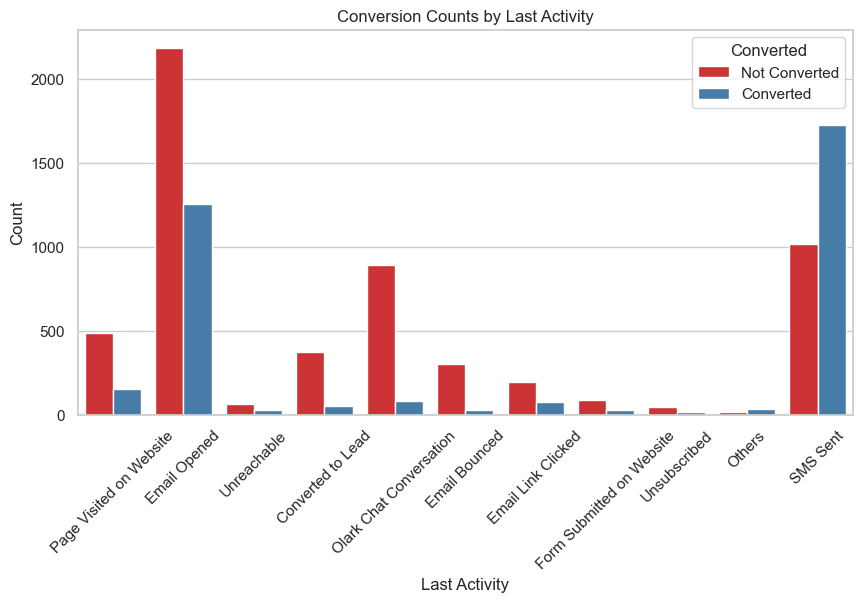

In [171]:
# Create a countplot to visualize conversion counts by 'Last_Activity' with 'Converted' as hue

sns.set(style="whitegrid")


plt.figure(figsize=(10, 5))
ax = sns.countplot(x="Last_Activity", hue="Converted", data=df, palette="Set1")


ax.set_title("Conversion Counts by Last Activity")
ax.set_xlabel("Last Activity")
ax.set_ylabel("Count")
ax.legend(title="Converted", labels=["Not Converted", "Converted"])

# Rotate x-axis labels for better readability
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

plt.show()

In [172]:
# Call the 'conversion_summary' function to calculate and print a conversion summary for the 'Last_Activity' column

conversion_summary(df, 'Last_Activity')

Converted                     0     1  Conversion(%)
Last_Activity                                       
Others                       14    37           73.0
SMS Sent                   1018  1727           63.0
Email Opened               2184  1253           36.0
Unreachable                  62    31           33.0
Email Link Clicked          194    73           27.0
Unsubscribed                 45    16           26.0
Form Submitted on Website    88    28           24.0
Page Visited on Website     489   151           24.0
Converted to Lead           374    54           13.0
Olark Chat Conversation     889    84            9.0
Email Bounced               300    26            8.0


Email Opened has the maximum number of leads.

SMS Sent has the highest conversion rate 63%

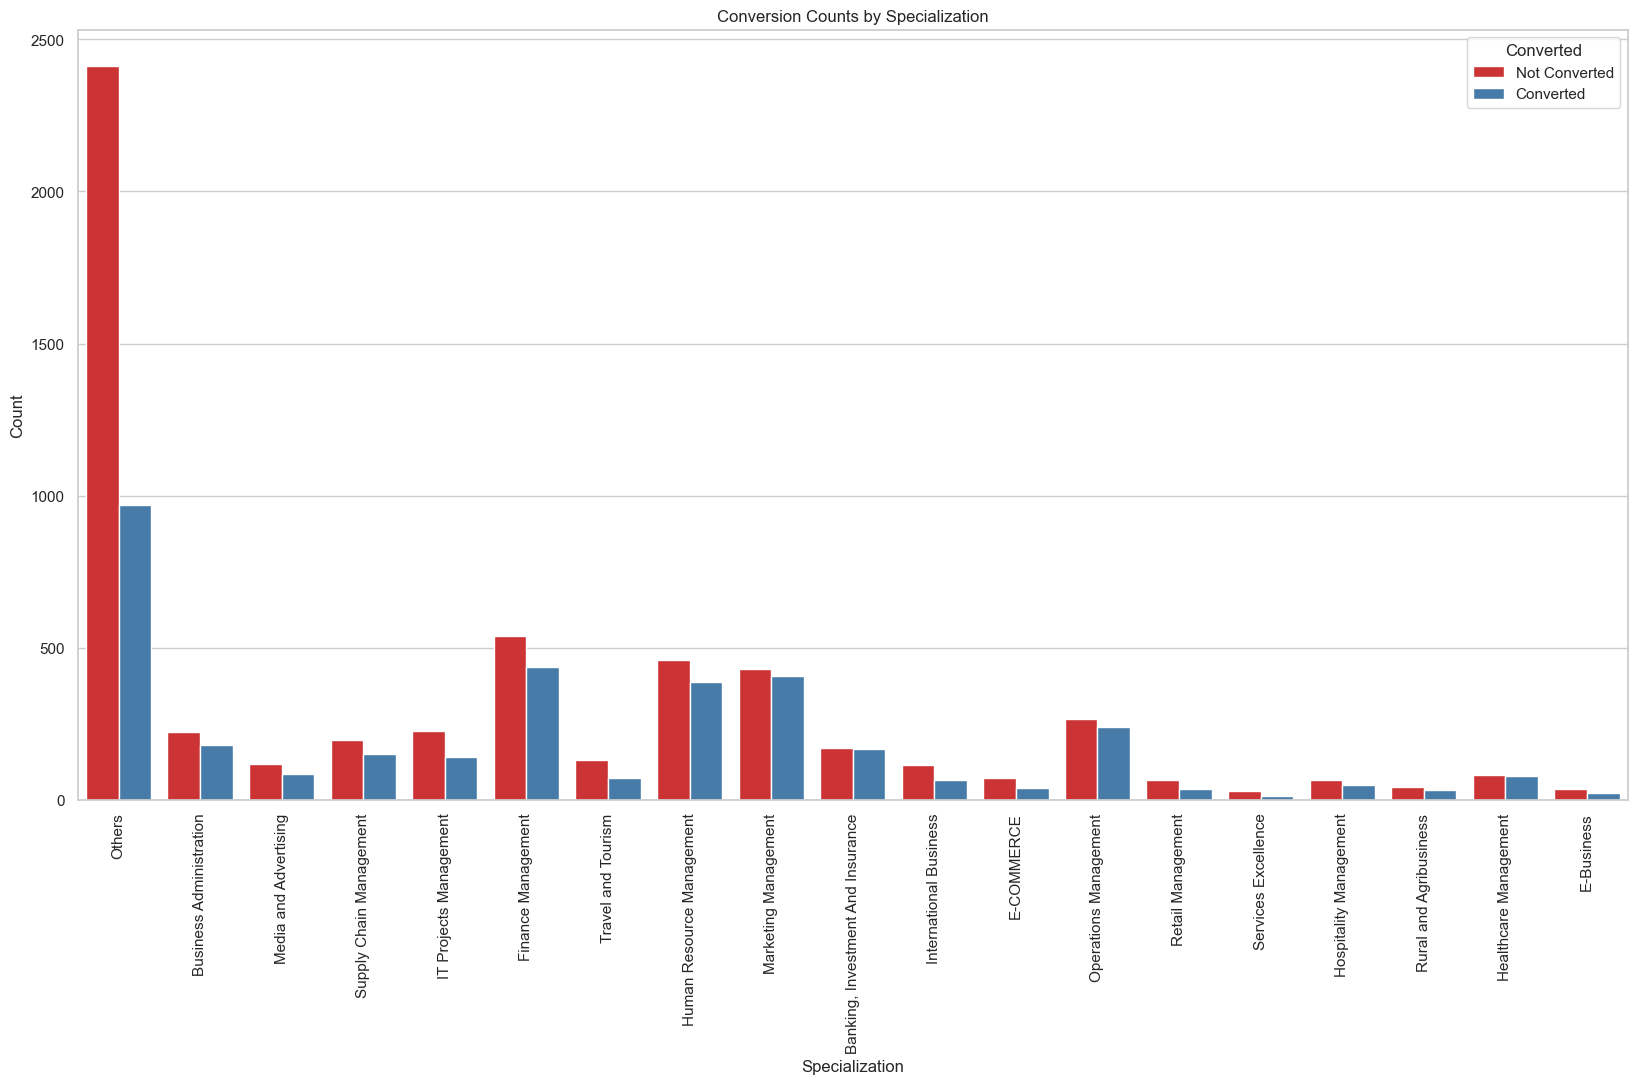

In [173]:
# Create a countplot to visualize conversion counts by 'Last_Activity' with 'Converted' as hue

sns.set(style="whitegrid")


plt.figure(figsize=(20, 10))
ax = sns.countplot(x="Specialization", hue="Converted", data=df, palette="Set1")


ax.set_title("Conversion Counts by Specialization")
ax.set_xlabel("Specialization")
ax.set_ylabel("Count")
ax.legend(title="Converted", labels=["Not Converted", "Converted"])

# Rotate x-axis labels for better readability
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

plt.show()

In [174]:
# Call the 'conversion_summary' function to calculate and print a conversion summary for the 'Specialization' column

conversion_summary(df, 'Specialization')

Converted                             0    1  Conversion(%)
Specialization                                             
Healthcare Management                80   79           50.0
Banking, Investment And Insurance   171  167           49.0
Marketing Management                430  408           49.0
Operations Management               265  238           47.0
Human Resource Management           460  388           46.0
Finance Management                  540  436           45.0
Business Administration             224  179           44.0
Supply Chain Management             198  151           43.0
Rural and Agribusiness               42   31           42.0
Hospitality Management               66   48           42.0
Media and Advertising               118   85           42.0
IT Projects Management              226  140           38.0
E-Business                           36   21           37.0
International Business              114   64           36.0
E-COMMERCE                           72 

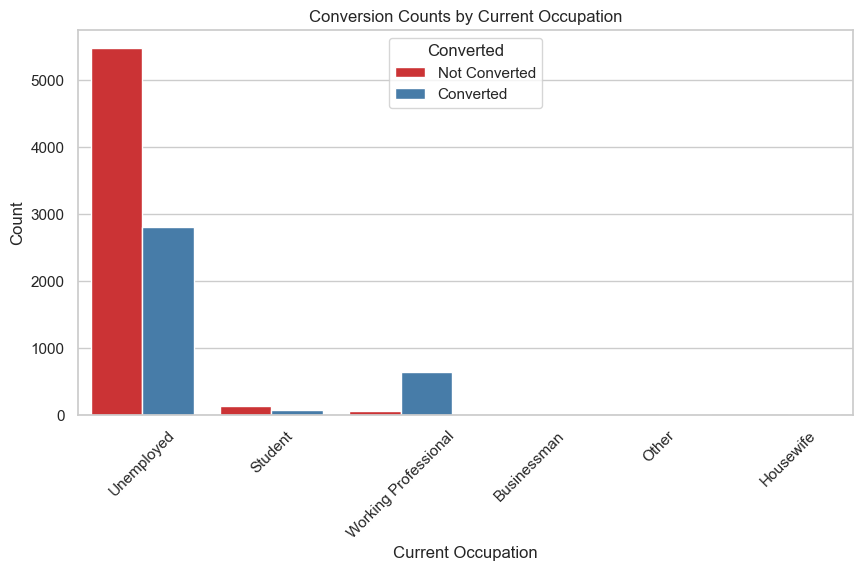

In [175]:
# Create a countplot to visualize conversion counts by 'What_is_your_current_occupation' with 'Converted' as hue

sns.set(style="whitegrid")


plt.figure(figsize=(10, 5))
ax = sns.countplot(x="What_is_your_current_occupation", hue="Converted", data=df, palette="Set1")


ax.set_title("Conversion Counts by Current Occupation")
ax.set_xlabel("Current Occupation")
ax.set_ylabel("Count")
ax.legend(title="Converted", labels=["Not Converted", "Converted"])

# Rotate x-axis labels for better readability
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

plt.show()

In [176]:
# Call the 'conversion_summary' function to calculate and print a conversion summary for the 'What_is_your_current_occupation' column

conversion_summary(df, 'What_is_your_current_occupation')

Converted                           0     1  Conversion(%)
What_is_your_current_occupation                           
Housewife                           0    10          100.0
Working Professional               59   647           92.0
Businessman                         3     5           62.0
Other                               6    10           62.0
Student                           132    78           37.0
Unemployed                       5479  2811           34.0


Working professionals have high conversion rate

Count of leads from the category Unemployed is the highest

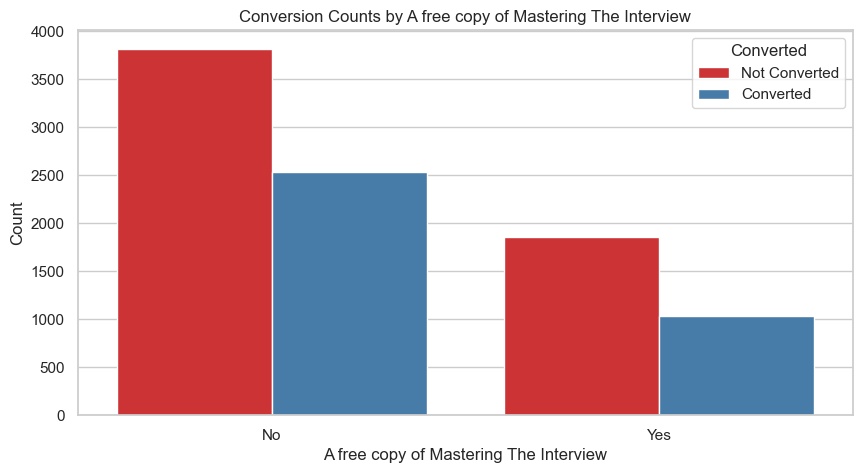

In [177]:
# Create a countplot to visualize conversion counts by 'A_free_copy_of_Mastering_The_Interview' with 'Converted' as hue

sns.set(style="whitegrid")


plt.figure(figsize=(10, 5))
ax = sns.countplot(x="A_free_copy_of_Mastering_The_Interview", hue="Converted", data=df, palette="Set1")


ax.set_title("Conversion Counts by A free copy of Mastering The Interview")
ax.set_xlabel("A free copy of Mastering The Interview")
ax.set_ylabel("Count")
ax.legend(title="Converted", labels=["Not Converted", "Converted"])

plt.show()

In [178]:
# Call the 'conversion_summary' function to calculate and print a conversion summary for the 'A_free_copy_of_Mastering_The_Interview' column

conversion_summary(df, 'A_free_copy_of_Mastering_The_Interview')

Converted                                  0     1  Conversion(%)
A_free_copy_of_Mastering_The_Interview                           
No                                      3821  2531           40.0
Yes                                     1858  1030           36.0


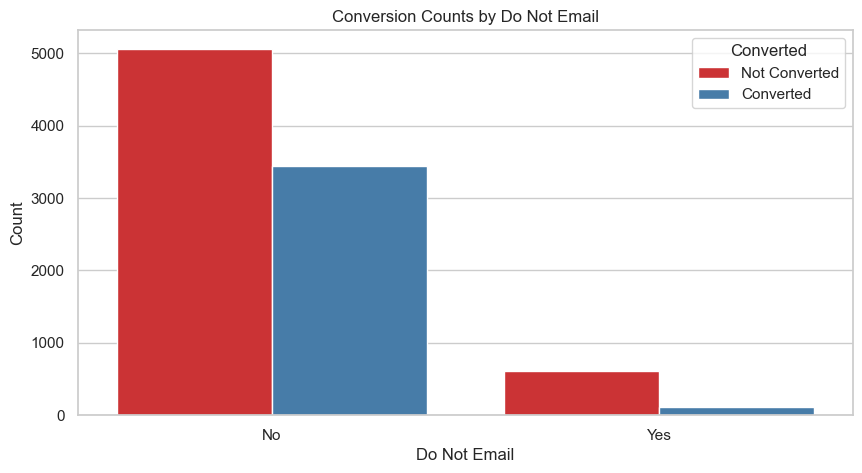

In [179]:
# Create a countplot to visualize conversion counts by 'Do_Not_Email' with 'Converted' as hue

sns.set(style="whitegrid")


plt.figure(figsize=(10, 5))
ax = sns.countplot(x="Do_Not_Email", hue="Converted", data=df, palette="Set1")


ax.set_title("Conversion Counts by Do Not Email")
ax.set_xlabel("Do Not Email")
ax.set_ylabel("Count")
ax.legend(title="Converted", labels=["Not Converted", "Converted"])

plt.show()

In [180]:
# Call the 'conversion_summary' function to calculate and print a conversion summary for the 'Do_Not_Email' column

conversion_summary(df, 'Do_Not_Email')

Converted        0     1  Conversion(%)
Do_Not_Email                           
No            5063  3443           40.0
Yes            616   118           16.0


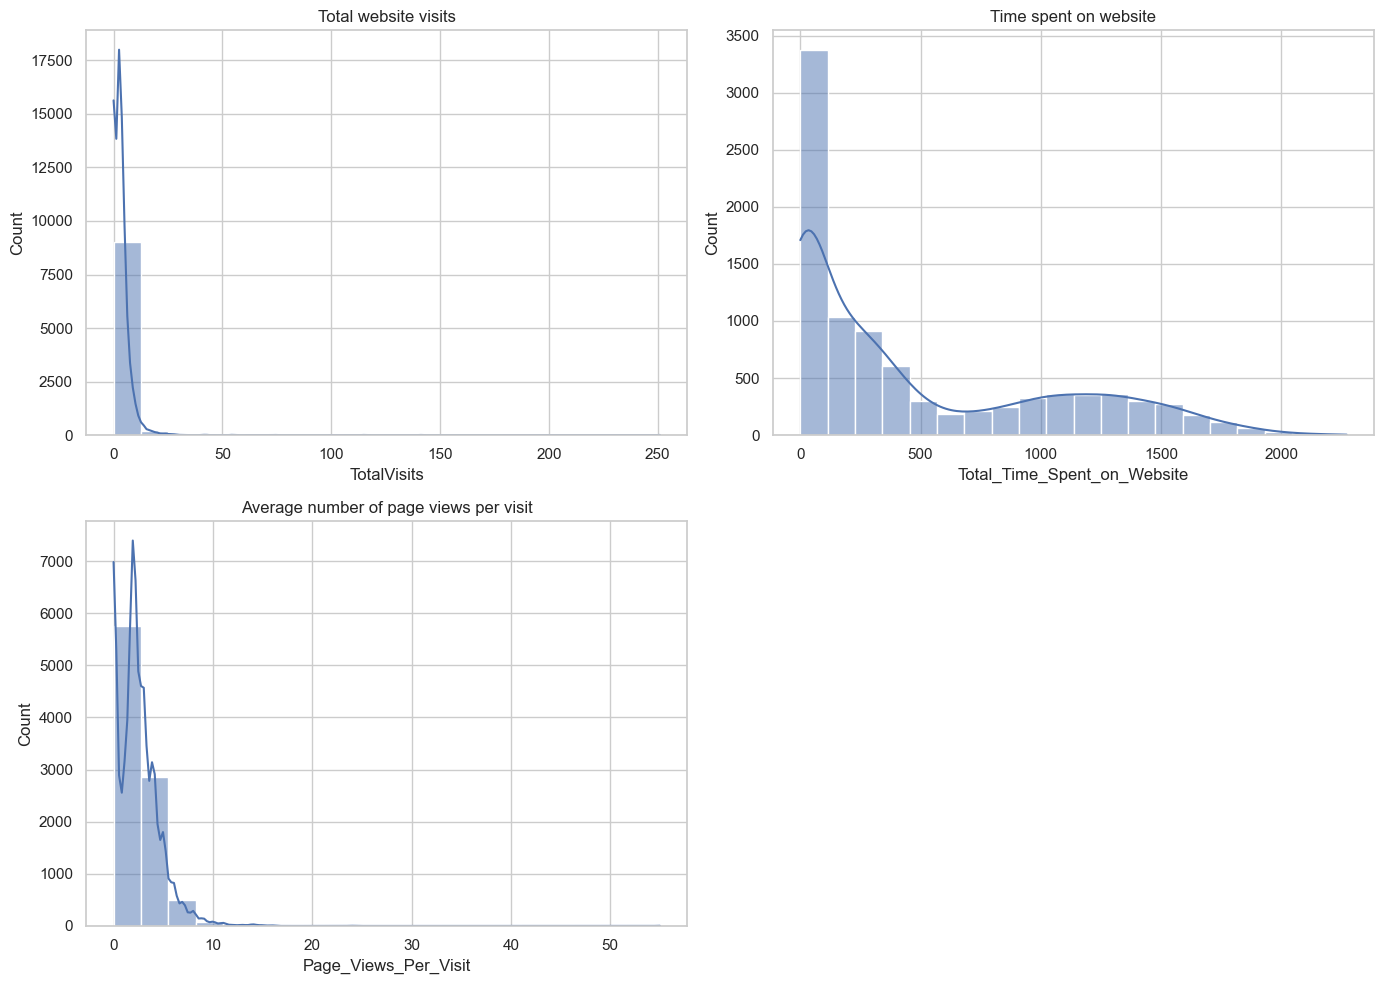

In [181]:
sns.set(style="whitegrid")

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plot histograms for TotalVisits, Total_Time_Spent_on_Website, and Page_Views_Per_Visit
sns.histplot(df['TotalVisits'], bins=20, ax=axes[0, 0], kde=True)
sns.histplot(df['Total_Time_Spent_on_Website'], bins=20, ax=axes[0, 1], kde=True)
sns.histplot(df['Page_Views_Per_Visit'], bins=20, ax=axes[1, 0], kde=True)

# Set titles for each subplot
axes[0, 0].set_title('Total website visits')
axes[0, 1].set_title('Time spent on website')
axes[1, 0].set_title('Average number of page views per visit')

# Remove the empty subplot
fig.delaxes(axes[1, 1])

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()

Outliers are present

Checking for Outliers


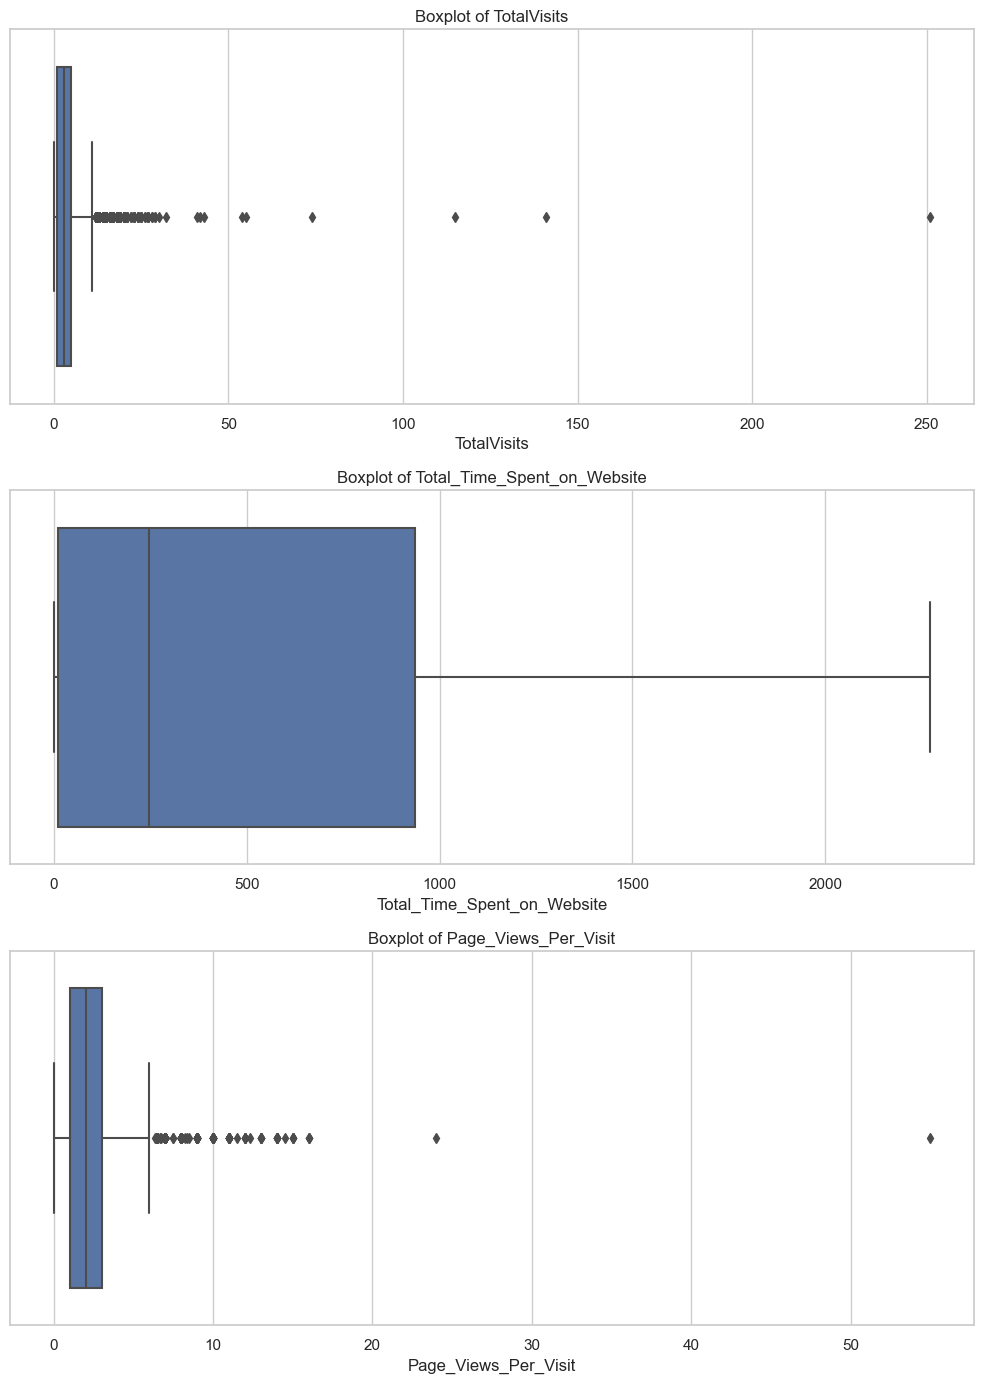

In [182]:
# Define a list of columns for which boxplots will be created

columns = ['TotalVisits', 'Total_Time_Spent_on_Website', 'Page_Views_Per_Visit']

# Create a subplots layout with 3 rows and 1 column, with a specified figure size

fig, axes = plt.subplots(3, 1, figsize=(10, 14))

for i, col in enumerate(columns):
    sns.boxplot(data=df, x=col, ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')

# Adjust subplot layout for better spacing

plt.tight_layout()
plt.show()

In [183]:
# Calculate the 5th and 95th percentiles for 'TotalVisits'
quan_5th = df['TotalVisits'].quantile(0.05)
quan_95th = df['TotalVisits'].quantile(0.95)

# Clip the 'TotalVisits' values to be within the 5th and 95th percentiles
df['TotalVisits'] = df['TotalVisits'].clip(lower=quan_5th, upper=quan_95th)

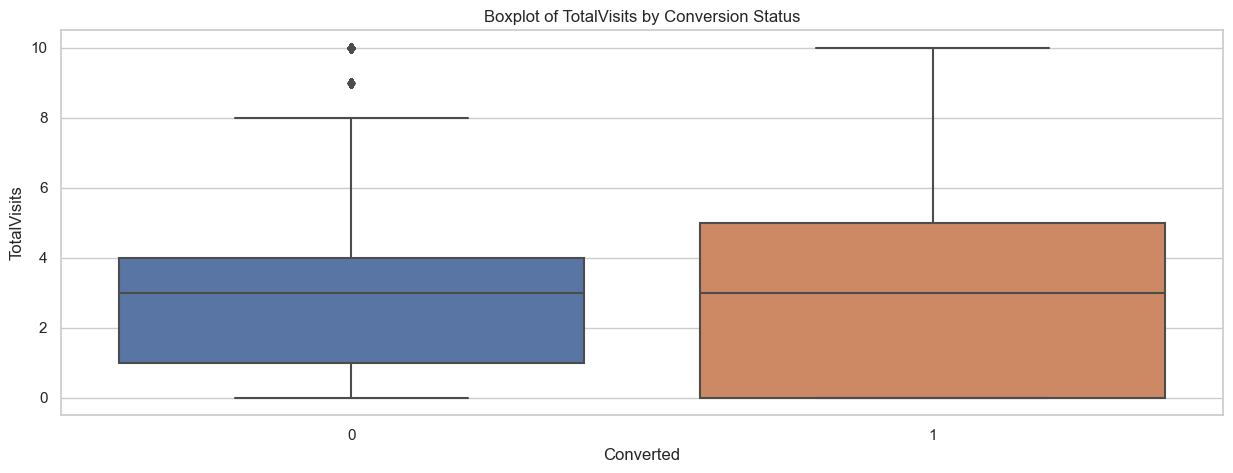

In [184]:
# Create a vertical boxplot to compare 'TotalVisits' by conversion status

plt.figure(figsize=(15, 5))
sns.boxplot(x='Converted', y='TotalVisits', data=df, orient='v')
plt.xlabel('Converted')
plt.ylabel('TotalVisits')
plt.title('Boxplot of TotalVisits by Conversion Status')
plt.show()

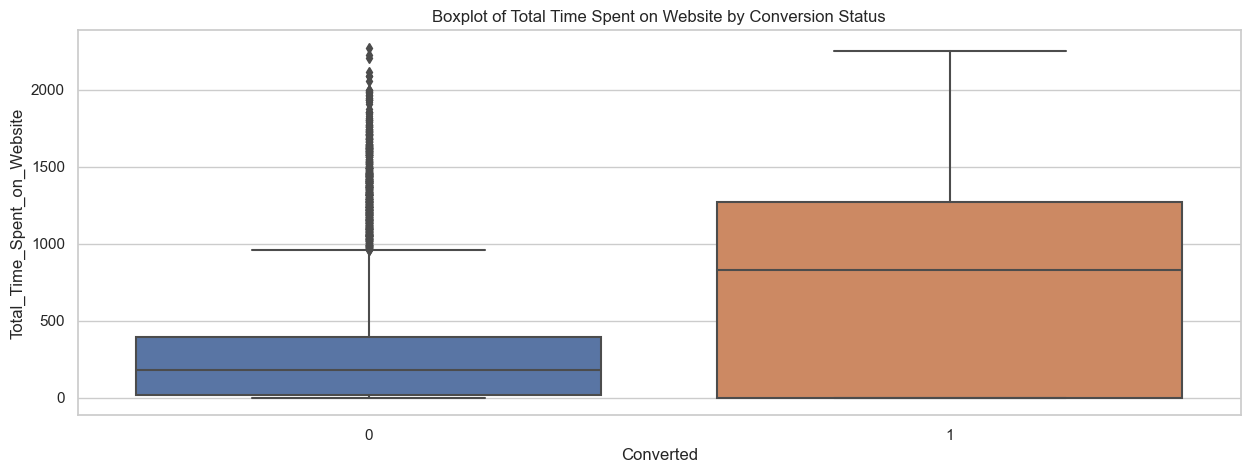

In [185]:
# Create a vertical boxplot to compare 'Total_Time_Spent_on_Website' by conversion status

plt.figure(figsize=(15, 5))
sns.boxplot(x='Converted', y='Total_Time_Spent_on_Website', data=df, orient='v')
plt.xlabel('Converted')
plt.ylabel('Total_Time_Spent_on_Website')
plt.title('Boxplot of Total Time Spent on Website by Conversion Status')
plt.show()

Users spending more time on the website tend to get converted 



In [186]:
# Calculate the 5th and 95th percentiles for 'Page_Views_Per_Visit'
quan_5th = df['Page_Views_Per_Visit'].quantile(0.05)
quan_95th = df['Page_Views_Per_Visit'].quantile(0.95)

# Clip the 'TotalVisits' values to be within the 5th and 95th percentiles
df['Page_Views_Per_Visit'] = df['Page_Views_Per_Visit'].clip(lower=quan_5th, upper=quan_95th)

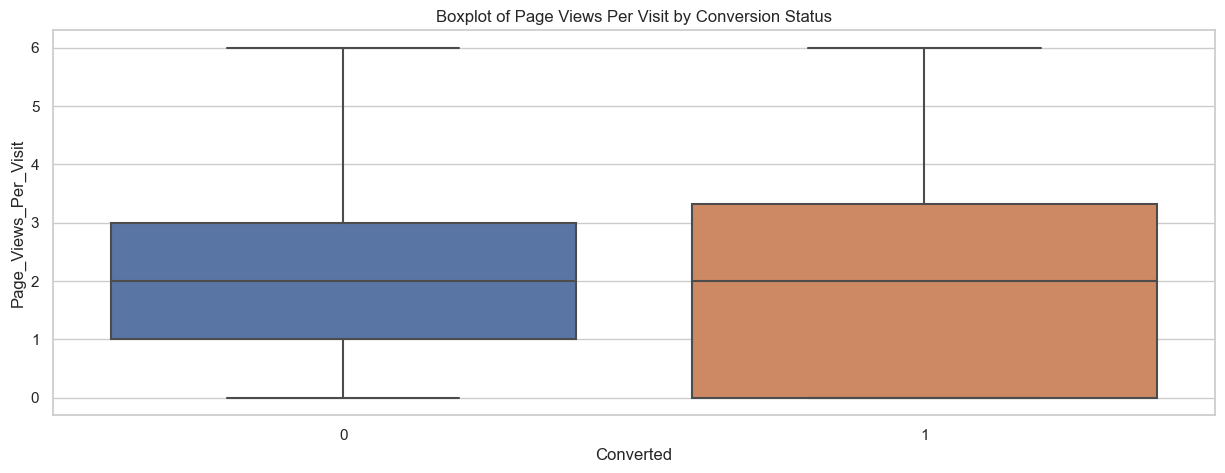

In [187]:
# Create a vertical boxplot to compare 'Page_Views_Per_Visit' by conversion status

plt.figure(figsize=(15, 5))
sns.boxplot(x='Converted', y='Page_Views_Per_Visit', data=df, orient='v')
plt.xlabel('Converted')
plt.ylabel('Page_Views_Per_Visit')
plt.title('Boxplot of Page Views Per Visit by Conversion Status')
plt.show()

In [188]:
# Remove the 'Lead_Number' and 'Prospect_ID' columns from the DataFrame as they are not being used

df = df.drop(['Lead_Number', 'Prospect_ID'],1)

In [189]:
binlist = ['Do_Not_Email']

# Define a mapping dictionary
mapping = {'Yes': 1, 'No': 0}

# Apply the mapping using the map function
df[binlist] = df[binlist].applymap(mapping.get)


In [190]:
df.head()

,Lead_Origin,Lead_Source,Do_Not_Email,Do_Not_Call,Converted,TotalVisits,Total_Time_Spent_on_Website,Page_Views_Per_Visit,Last_Activity,Country,Specialization,What_is_your_current_occupation,What_matters_most_to_you_in_choosing_a_course,Search,Magazine,Newspaper_Article,X_Education_Forums,Newspaper,Digital_Advertisement,Through_Recommendations,Receive_More_Updates_About_Our_Courses,Tags,Update_me_on_Supply_Chain_Content,Get_updates_on_DM_Content,City,I_agree_to_pay_the_amount_through_cheque,A_free_copy_of_Mastering_The_Interview,Last_Notable_Activity
0,API,Olark Chat,0,No,0,0.0,0,0.0,Page Visited on Website,India,Others,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,No,No,Mumbai,No,No,Modified
1,API,Organic Search,0,No,0,5.0,674,2.5,Email Opened,India,Others,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,No,No,Mumbai,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,0,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,Mumbai,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,0,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,No,No,Mumbai,No,No,Modified
4,Landing Page Submission,Google,0,No,1,2.0,1428,1.0,Converted to Lead,India,Others,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,Mumbai,No,No,Modified


In [191]:
# Dropping columns that are not very useful

df = df.drop(['What_matters_most_to_you_in_choosing_a_course','Search','Magazine','Newspaper_Article',
              'X_Education_Forums','Newspaper','Digital_Advertisement','Through_Recommendations',
              'Receive_More_Updates_About_Our_Courses','Update_me_on_Supply_Chain_Content',
           'Get_updates_on_DM_Content','I_agree_to_pay_the_amount_through_cheque',
           'A_free_copy_of_Mastering_The_Interview','Country','Do_Not_Call'],1)

Creating Dummy Variable

In [192]:
dum_var = ['Lead_Origin', 'Lead_Source', 'Last_Activity', 'Specialization',
           'What_is_your_current_occupation','City', 'Tags', 
           'Last_Notable_Activity']

# Create dummy variables with drop_first=True
dummy_data = pd.get_dummies(df[dum_var], drop_first=True)

dummy_data.head()

,Lead_Origin_Landing Page Submission,Lead_Origin_Lead Add Form,Lead_Origin_Lead Import,Lead_Origin_Quick Add Form,Lead_Source_Facebook,Lead_Source_Google,Lead_Source_Olark Chat,Lead_Source_Organic Search,Lead_Source_Others,Lead_Source_Pay per Click Ads,Lead_Source_Reference,Lead_Source_Referral Sites,Lead_Source_Welingak Website,Last_Activity_Email Bounced,Last_Activity_Email Link Clicked,Last_Activity_Email Opened,Last_Activity_Form Submitted on Website,Last_Activity_Olark Chat Conversation,Last_Activity_Others,Last_Activity_Page Visited on Website,Last_Activity_SMS Sent,Last_Activity_Unreachable,Last_Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What_is_your_current_occupation_Housewife,What_is_your_current_occupation_Other,What_is_your_current_occupation_Student,What_is_your_current_occupation_Unemployed,What_is_your_current_occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_Not doing further education,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,Last_Notable_Activity_Email Bounced,Last_Notable_Activity_Email Link Clicked,Last_Notable_Activity_Email Marked Spam,Last_Notable_Activity_Email Opened,Last_Notable_Activity_Email Received,Last_Notable_Activity_Form Submitted on Website,Last_Notable_Activity_Had a Phone Conversation,Last_Notable_Activity_Modified,Last_Notable_Activity_Olark Chat Conversation,Last_Notable_Activity_Page Visited on Website,Last_Notable_Activity_Resubscribed to emails,Last_Notable_Activity_SMS Sent,Last_Notable_Activity_Unreachable,Last_Notable_Activity_Unsubscribed,Last_Notable_Activity_View in browser link Clicked
0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [193]:
# Concatenate the original DataFrame 'df' with 'dummy_data' along columns (axis=1)

df = pd.concat([df, dummy_data], axis=1)
df.head()

,Lead_Origin,Lead_Source,Do_Not_Email,Converted,TotalVisits,Total_Time_Spent_on_Website,Page_Views_Per_Visit,Last_Activity,Specialization,What_is_your_current_occupation,Tags,City,Last_Notable_Activity,Lead_Origin_Landing Page Submission,Lead_Origin_Lead Add Form,Lead_Origin_Lead Import,Lead_Origin_Quick Add Form,Lead_Source_Facebook,Lead_Source_Google,Lead_Source_Olark Chat,Lead_Source_Organic Search,Lead_Source_Others,Lead_Source_Pay per Click Ads,Lead_Source_Reference,Lead_Source_Referral Sites,Lead_Source_Welingak Website,Last_Activity_Email Bounced,Last_Activity_Email Link Clicked,Last_Activity_Email Opened,Last_Activity_Form Submitted on Website,Last_Activity_Olark Chat Conversation,Last_Activity_Others,Last_Activity_Page Visited on Website,Last_Activity_SMS Sent,Last_Activity_Unreachable,Last_Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,...,What_is_your_current_occupation_Housewife,What_is_your_current_occupation_Other,What_is_your_current_occupation_Student,What_is_your_current_occupation_Unemployed,What_is_your_current_occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_Not doing further education,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,Last_Notable_Activity_Email Bounced,Last_Notable_Activity_Email Link Clicked,Last_Notable_Activity_Email Marked Spam,Last_Notable_Activity_Email Opened,Last_Notable_Activity_Email Received,Last_Notable_Activity_Form Submitted on Website,Last_Notable_Activity_Had a Phone Conversation,Last_Notable_Activity_Modified,Last_Notable_Activity_Olark Chat Conversation,Last_Notable_Activity_Page Visited on Website,Last_Notable_Activity_Resubscribed to emails,Last_Notable_Activity_SMS Sent,Last_Notable_Activity_Unreachable,Last_Notable_Activity_Unsubscribed,Last_Notable_Activity_View in browser link Clicked
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,Interested in other courses,Mumbai,Modified,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Others,Unemployed,Ringing,Mumbai,Email Opened,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Mumbai,Email Opened,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Ringing,Mumbai,Modified,1,0,0,0,0,0,0,0,0,

In [194]:
drop_cols = ['Lead_Origin', 'Lead_Source', 'Last_Activity', 'Specialization', 
             'What_is_your_current_occupation', 'City', 'Tags', 
             'Last_Notable_Activity']

# Drop the specified columns from the DataFrame 'df'
df = df.drop(columns=drop_cols)

df.head()

,Do_Not_Email,Converted,TotalVisits,Total_Time_Spent_on_Website,Page_Views_Per_Visit,Lead_Origin_Landing Page Submission,Lead_Origin_Lead Add Form,Lead_Origin_Lead Import,Lead_Origin_Quick Add Form,Lead_Source_Facebook,Lead_Source_Google,Lead_Source_Olark Chat,Lead_Source_Organic Search,Lead_Source_Others,Lead_Source_Pay per Click Ads,Lead_Source_Reference,Lead_Source_Referral Sites,Lead_Source_Welingak Website,Last_Activity_Email Bounced,Last_Activity_Email Link Clicked,Last_Activity_Email Opened,Last_Activity_Form Submitted on Website,Last_Activity_Olark Chat Conversation,Last_Activity_Others,Last_Activity_Page Visited on Website,Last_Activity_SMS Sent,Last_Activity_Unreachable,Last_Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What_is_your_current_occupation_Housewife,What_is_your_current_occupation_Other,What_is_your_current_occupation_Student,What_is_your_current_occupation_Unemployed,What_is_your_current_occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_Not doing further education,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,Last_Notable_Activity_Email Bounced,Last_Notable_Activity_Email Link Clicked,Last_Notable_Activity_Email Marked Spam,Last_Notable_Activity_Email Opened,Last_Notable_Activity_Email Received,Last_Notable_Activity_Form Submitted on Website,Last_Notable_Activity_Had a Phone Conversation,Last_Notable_Activity_Modified,Last_Notable_Activity_Olark Chat Conversation,Last_Notable_Activity_Page Visited on Website,Last_Notable_Activity_Resubscribed to emails,Last_Notable_Activity_SMS Sent,Last_Notable_Activity_Unreachable,Last_Notable_Activity_Unsubscribed,Last_Notable_Activity_View in browser link Clicked
0,0,0,0.0,0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,1,2.0,1532,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,1,2.0,1428,1.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [195]:
df.shape

(9240, 96)

Train-Test Split

In [196]:
# Extract the predictor variables (x) by dropping the 'Converted' column along the columns (axis=1)
x = df.drop(['Converted'], axis=1)

# Extract the target variable (y) by selecting only the 'Converted' column
y = df['Converted']

In [197]:
# Split the data into training (70%) and testing (30%) sets

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, test_size=0.3, random_state=100)

Feature Scaling

In [198]:
scaler = StandardScaler()

# Fit the scaler on the selected columns
scaler.fit(x_train[['TotalVisits', 'Total_Time_Spent_on_Website', 'Page_Views_Per_Visit']])

# Transform the selected columns using the fitted scaler
x_train[['TotalVisits', 'Total_Time_Spent_on_Website',
         'Page_Views_Per_Visit']] = scaler.transform(x_train[['TotalVisits', 'Total_Time_Spent_on_Website', 
                                                              'Page_Views_Per_Visit']])

In [199]:
x_train.head()

,Do_Not_Email,TotalVisits,Total_Time_Spent_on_Website,Page_Views_Per_Visit,Lead_Origin_Landing Page Submission,Lead_Origin_Lead Add Form,Lead_Origin_Lead Import,Lead_Origin_Quick Add Form,Lead_Source_Facebook,Lead_Source_Google,Lead_Source_Olark Chat,Lead_Source_Organic Search,Lead_Source_Others,Lead_Source_Pay per Click Ads,Lead_Source_Reference,Lead_Source_Referral Sites,Lead_Source_Welingak Website,Last_Activity_Email Bounced,Last_Activity_Email Link Clicked,Last_Activity_Email Opened,Last_Activity_Form Submitted on Website,Last_Activity_Olark Chat Conversation,Last_Activity_Others,Last_Activity_Page Visited on Website,Last_Activity_SMS Sent,Last_Activity_Unreachable,Last_Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What_is_your_current_occupation_Housewife,What_is_your_current_occupation_Other,What_is_your_current_occupation_Student,What_is_your_current_occupation_Unemployed,What_is_your_current_occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_Not doing further education,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,Last_Notable_Activity_Email Bounced,Last_Notable_Activity_Email Link Clicked,Last_Notable_Activity_Email Marked Spam,Last_Notable_Activity_Email Opened,Last_Notable_Activity_Email Received,Last_Notable_Activity_Form Submitted on Website,Last_Notable_Activity_Had a Phone Conversation,Last_Notable_Activity_Modified,Last_Notable_Activity_Olark Chat Conversation,Last_Notable_Activity_Page Visited on Website,Last_Notable_Activity_Resubscribed to emails,Last_Notable_Activity_SMS Sent,Last_Notable_Activity_Unreachable,Last_Notable_Activity_Unsubscribed,Last_Notable_Activity_View in browser link Clicked
1871,0,-1.149699,-0.885371,-1.266675,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
6795,0,0.299722,0.005716,-0.516439,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3516,0,0.662077,-0.691418,0.143543,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
8105,0,0.662077,1.365219,1.553761,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3934,0,-1.149699,-0.885371,-1.266675,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [200]:
# Calculate the conversion rate as a percentage:
# 1. Take the mean of the 'Converted' column, which represents the proportion of converted leads.
# 2. Multiply by 100 to express the rate as a percentage.

conversion_rate = round(df['Converted'].mean() * 100, 2)

conversion_rate

38.54

Correlation

In [201]:
# Correlation between different numerical variables for both the Converted and not-converted cases
corr = df.corr()

# Unstacking the correlation matrix to find out top correlations
corr_unstacked = corr.unstack().sort_values(kind="quicksort")
corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool_)).stack().sort_values(ascending=False).head(10)

Lead_Origin_Lead Import                Lead_Source_Facebook                             0.981709
Last_Activity_Unsubscribed             Last_Notable_Activity_Unsubscribed               0.877108
Last_Activity_Email Opened             Last_Notable_Activity_Email Opened               0.862718
Lead_Origin_Lead Add Form              Lead_Source_Reference                            0.853237
Last_Activity_SMS Sent                 Last_Notable_Activity_SMS Sent                   0.852707
Last_Activity_Email Link Clicked       Last_Notable_Activity_Email Link Clicked         0.800764
TotalVisits                            Page_Views_Per_Visit                             0.767585
Last_Activity_Page Visited on Website  Last_Notable_Activity_Page Visited on Website    0.692057
Do_Not_Email                           Last_Activity_Email Bounced                      0.618470
Last_Activity_Unreachable              Last_Notable_Activity_Unreachable                0.584642
dtype: float64

In [202]:
# These columns are being dropped from both x_test and x_train datasets

x_test = x_test.drop(['Lead_Source_Facebook','Last_Notable_Activity_Unsubscribed','Last_Notable_Activity_SMS Sent',
                      'Last_Notable_Activity_Email Opened','Last_Notable_Activity_Unreachable','Last_Notable_Activity_Email Link Clicked',
                      'Last_Notable_Activity_Page Visited on Website'], 1)
x_train = x_train.drop(['Lead_Source_Facebook','Last_Notable_Activity_Unsubscribed','Last_Notable_Activity_SMS Sent',
                      'Last_Notable_Activity_Email Opened','Last_Notable_Activity_Unreachable','Last_Notable_Activity_Email Link Clicked',
                      'Last_Notable_Activity_Page Visited on Website'], 1)

In [203]:
# Calculate the correlation matrix among the predictor variables in the training dataset

conv_corr = x_train.corr()

In [204]:
# Find and display the top positive correlations between predictor variables in the training dataset
# 1. The 'conv_corr' DataFrame is filtered to retain only the upper triangle part of the correlation matrix.
# 2. Correlations are sorted in descending order to identify the strongest positive correlations.

conv_corr.where(np.triu(np.ones(conv_corr.shape), k=1).astype(np.bool_)).stack().sort_values(ascending=False).head(10)

Lead_Origin_Lead Add Form              Lead_Source_Reference                             0.862134
TotalVisits                            Page_Views_Per_Visit                              0.762929
Do_Not_Email                           Last_Activity_Email Bounced                       0.631980
Page_Views_Per_Visit                   Lead_Origin_Landing Page Submission               0.555461
Last_Activity_Others                   Last_Notable_Activity_Had a Phone Conversation    0.536902
Lead_Source_Olark Chat                 Specialization_Others                             0.498444
TotalVisits                            Lead_Origin_Landing Page Submission               0.454790
Lead_Source_Olark Chat                 Last_Activity_Olark Chat Conversation             0.430903
Last_Activity_Olark Chat Conversation  Last_Notable_Activity_Olark Chat Conversation     0.407519
Lead_Origin_Lead Add Form              Lead_Source_Welingak Website                      0.406570
dtype: float64

Model Building

In [205]:
# Create an instance of Logistic Regression estimator
lr = LogisticRegression()

# Create an instance of RFE with the estimator and the number of features to select
rfe = RFE(estimator=lr, n_features_to_select=15)

# Fit the RFE selector to the training data
rfe.fit(x_train, y_train)

RFE(estimator=LogisticRegression(), n_features_to_select=15)

In [206]:
# Generate a list of tuples with information about feature selection using RFE:
# 1. Column name from 'x_train.columns'.
# 2. Boolean value from 'rfe.support_' indicating whether the feature is selected (True) or not (False) in the RFE process.
# 3. Integer value from 'rfe.ranking_' representing the ranking of the feature in the feature selection process.

list(zip(x_train.columns, rfe.support_, rfe.ranking_))

[('Do_Not_Email', False, 8),
 ('TotalVisits', False, 40),
 ('Total_Time_Spent_on_Website', False, 11),
 ('Page_Views_Per_Visit', False, 41),
 ('Lead_Origin_Landing Page Submission', False, 3),
 ('Lead_Origin_Lead Add Form', True, 1),
 ('Lead_Origin_Lead Import', False, 62),
 ('Lead_Origin_Quick Add Form', False, 49),
 ('Lead_Source_Google', False, 45),
 ('Lead_Source_Olark Chat', False, 27),
 ('Lead_Source_Organic Search', False, 44),
 ('Lead_Source_Others', False, 52),
 ('Lead_Source_Pay per Click Ads', False, 73),
 ('Lead_Source_Reference', False, 50),
 ('Lead_Source_Referral Sites', False, 46),
 ('Lead_Source_Welingak Website', True, 1),
 ('Last_Activity_Email Bounced', False, 32),
 ('Last_Activity_Email Link Clicked', False, 29),
 ('Last_Activity_Email Opened', False, 59),
 ('Last_Activity_Form Submitted on Website', False, 47),
 ('Last_Activity_Olark Chat Conversation', False, 33),
 ('Last_Activity_Others', True, 1),
 ('Last_Activity_Page Visited on Website', False, 30),
 ('Last_A

In [207]:
# Extract the names of the columns (features) that were selected during RFE feature selection.

col = x_train.columns[rfe.support_]

In [208]:
# Add a constant term (intercept) to the predictor variables in the training data
x_train_sm = sm.add_constant(x_train[col])

# Create a logistic regression model with the training data and specify the binomial family
logm = sm.GLM(y_train, x_train_sm, family=sm.families.Binomial())

# Fit the logistic regression model to the training data
res = logm.fit()

# Generate a summary of the model including coefficients, statistics, and other information
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2080.1
Date:                Tue, 17 Oct 2023   Deviance:                       4160.2
Time:                        12:25:42   Pearson chi2:                 1.26e+04
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4965
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -3.5134      0.197    -17.817      0.000      -3.900      -3.127
Lead_Origin_Lead Add Form                                2.3277      0.232     10.026      0.000       1.873       2.783
Lead_Source_Welingak Website                             1.4952      0.775      1.929      0.054      -0.024       3.014
Last_Activity_Others                                     2.0876      0.576      3.627      0.000       0.959       3.216
Last_Activity_SMS Sent                                   1.8497      0.088     21.015      0.000       1.677       2.022
What_is_your_current_occupation_Working Professional     3.0849      0.236     13.097      0.000       2.623       3.547
Tags_Busy                                                2.7820      0.283      9.844      0.000       2.228       3.336
Tags_Closed by Horizzon                                  9.2820      1.028      9.031      0.000       7.267      11.297
Tags_Interested in Next batch                           23.9637   2.08e+04      0.001      0.999   -4.08e+04    4.09e+04
Tags_Lateral student                                    25.3417   2.43e+04      0.001      0.999   -4.75e+04    4.76e+04
Tags_Lost to EINS                                        8.6057      0.747     11.517      0.000       7.141      10.070
Tags_Ringing                                            -1.1983      0.293     -4.083      0.000      -1.774      -0.623
Tags_Will revert after reading the email                 3.2908      0.198     16.656      0.000       2.904       3.678
Tags_switched off                                       -1.4351      0.548     -2.617      0.009      -2.510      -0.360
Last_Notable_Activity_Modified                          -1.7835      0.090    -19.849      0.000      -1.960      -1.607
Last_Notable_Activity_Olark Chat Conversation           -1.6921      0.319     -5.304      0.000      -2.317      -1.067
========================================================================================================================
"""

In [209]:
# Get the predicted probabilities for the training data directly from the fitted model
y_train_pred = res.predict(x_train_sm)

# Display the first 10 predicted probabilities
y_train_pred[:10]

1871    0.008910
6795    0.444583
3516    0.008910
8105    0.054064
3934    0.118570
4844    0.991093
3297    0.008910
8071    0.999990
987     0.118570
7423    0.835771
dtype: float64

In [210]:
# Reshape the predicted probabilities to ensure it's a one-dimensional array
y_train_pred = y_train_pred.values.reshape(-1)

# Display the first 10 values of the reshaped predicted probabilities
y_train_pred[:10]

array([0.0089096 , 0.44458337, 0.0089096 , 0.05406423, 0.11857015,
       0.99109297, 0.0089096 , 0.99998972, 0.11857015, 0.83577103])

In [211]:
# Create a DataFrame with 'Convert' and 'Convert_Prob' columns
y_train_pred_final = pd.concat([pd.Series(y_train.values, name='Convert'), pd.Series(y_train_pred, name='Convert_Prob')], axis=1)

# Add the 'Pros_ID' column with the training data indices
y_train_pred_final['Pros_ID'] = y_train.index

# Display the first few rows of the DataFrame
y_train_pred_final.head()

,Convert,Convert_Prob,Pros_ID
0,0,0.008910,1871
1,0,0.444583,6795
2,0,0.008910,3516
3,0,0.054064,8105
4,0,0.118570,3934


In [212]:
# Create the 'Predicted' column using the apply method
y_train_pred_final['Predicted'] = y_train_pred_final['Convert_Prob'].apply(lambda x: 1 if x > 0.5 else 0)

In [213]:
y_train_pred_final.head()

,Convert,Convert_Prob,Pros_ID,Predicted
0,0,0.008910,1871,0
1,0,0.444583,6795,0
2,0,0.008910,3516,0
3,0,0.054064,8105,0
4,0,0.118570,3934,0


In [214]:
print("Accuracy score: ", metrics.accuracy_score(y_train_pred_final.Convert, y_train_pred_final.Predicted))

Accuracy score:  0.8593073593073594


In [215]:
# Add a constant term (intercept) to the predictor variables in the training data
x_train_sm = sm.add_constant(x_train[col])

# Create a logistic regression model with the training data and specify the binomial family
logm1 = sm.GLM(y_train, x_train_sm, family=sm.families.Binomial())

# Fit the logistic regression model to the training data
res = logm1.fit()

# Generate a summary of the model including coefficients, statistics, and other information
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2080.1
Date:                Tue, 17 Oct 2023   Deviance:                       4160.2
Time:                        12:25:42   Pearson chi2:                 1.26e+04
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4965
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -3.5134      0.197    -17.817      0.000      -3.900      -3.127
Lead_Origin_Lead Add Form                                2.3277      0.232     10.026      0.000       1.873       2.783
Lead_Source_Welingak Website                             1.4952      0.775      1.929      0.054      -0.024       3.014
Last_Activity_Others                                     2.0876      0.576      3.627      0.000       0.959       3.216
Last_Activity_SMS Sent                                   1.8497      0.088     21.015      0.000       1.677       2.022
What_is_your_current_occupation_Working Professional     3.0849      0.236     13.097      0.000       2.623       3.547
Tags_Busy                                                2.7820      0.283      9.844      0.000       2.228       3.336
Tags_Closed by Horizzon                                  9.2820      1.028      9.031      0.000       7.267      11.297
Tags_Interested in Next batch                           23.9637   2.08e+04      0.001      0.999   -4.08e+04    4.09e+04
Tags_Lateral student                                    25.3417   2.43e+04      0.001      0.999   -4.75e+04    4.76e+04
Tags_Lost to EINS                                        8.6057      0.747     11.517      0.000       7.141      10.070
Tags_Ringing                                            -1.1983      0.293     -4.083      0.000      -1.774      -0.623
Tags_Will revert after reading the email                 3.2908      0.198     16.656      0.000       2.904       3.678
Tags_switched off                                       -1.4351      0.548     -2.617      0.009      -2.510      -0.360
Last_Notable_Activity_Modified                          -1.7835      0.090    -19.849      0.000      -1.960      -1.607
Last_Notable_Activity_Olark Chat Conversation           -1.6921      0.319     -5.304      0.000      -2.317      -1.067
========================================================================================================================
"""

Calculating VIF

In [216]:
# Calculate VIF for all features in x_train[col]
vif = pd.DataFrame()
vif['Features'] = x_train[col].columns
vif['VIF'] = [variance_inflation_factor(x_train[col].values, i) for i in range(x_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by="VIF", ascending=False)
vif

,Features,VIF
6,Tags_Closed by Horizzon,1.27
1,Lead_Source_Welingak Website,1.25
5,Tags_Busy,1.04
9,Tags_Lost to EINS,1.04
12,Tags_switched off,1.04
14,Last_Notable_Activity_Olark Chat Conversation,1.03
2,Last_Activity_Others,1.02
7,Tags_Interested in Next batch,1.00
8,Tags_Lateral student,1.00
4,What_is_your_current_occupation_Working Profes...,0.59


In [217]:
# Get the predicted probabilities and reshape them
y_train_pred = res.predict(x_train_sm).values

# Create the 'Predicted' column using NumPy where 1 if Convert_Prob > 0.5 else 0
y_train_pred_final['Predicted'] = np.where(y_train_pred > 0.5, 1, 0)

In [218]:
y_train_pred_final.head()


,Convert,Convert_Prob,Pros_ID,Predicted
0,0,0.008910,1871,0
1,0,0.444583,6795,0
2,0,0.008910,3516,0
3,0,0.054064,8105,0
4,0,0.118570,3934,0


In [219]:
print("Accuracy score: ", metrics.accuracy_score(y_train_pred_final.Convert, y_train_pred_final.Predicted))

Accuracy score:  0.8593073593073594


In [220]:
def evaluate_model(y_true, y_predicted, print_score=False):
    # Calculate the confusion matrix
    confusion = confusion_matrix(y_true, y_predicted)

    # Extract values from the confusion matrix
    TN, FP, FN, TP = confusion.ravel()

    # Calculate evaluation metrics
    accuracy_sc = metrics.accuracy_score(y_true, y_predicted)
    sensitivity_score = TP / (TP + FN)
    specificity_score = TN / (TN + FP)
    precision_sc = precision_score(y_true, y_predicted)
    
    if print_score:
        # Print the confusion matrix and evaluation metrics if requested
        print("Confusion Matrix:\n", confusion)
        print("Accuracy:", accuracy_sc)
        print("Sensitivity:", sensitivity_score)
        print("Specificity:", specificity_score)
        print("Precision:", precision_sc)
        
    return accuracy_sc, sensitivity_score, specificity_score, precision_sc

In [221]:
# Evaluate the binary classification model using actual and predicted values

evaluate_model(y_train_pred_final['Convert'], y_train_pred_final['Predicted'], print_score=True)

Confusion Matrix:
 [[3868  134]
 [ 776 1690]]
Accuracy: 0.8593073593073594
Sensitivity: 0.6853203568532036
Specificity: 0.9665167416291854
Precision: 0.9265350877192983


(0.8593073593073594,
 0.6853203568532036,
 0.9665167416291854,
 0.9265350877192983)

Plotting the ROC Curve

In [222]:
# Function to plot the ROC curve and calculate the AUC score for a binary classification model
# It takes actual values and predicted probabilities as input

def draw_roc(actual, probs):
    # Calculate the false positive rate (fpr), true positive rate (tpr), and thresholds
    fpr, tpr, thresholds = metrics.roc_curve(actual, probs)
    
    # Calculate the AUC score
    auc_score = metrics.roc_auc_score(actual, probs)

    # Create a plot of the ROC curve
    plt.figure(figsize=(5, 5))
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score)
    plt.plot([0, 1], [0, 1], 'k--')  # Plot the diagonal line
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

    return None

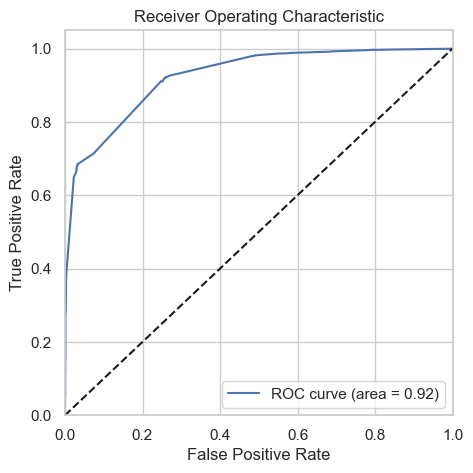

In [223]:
# Calculate the FPR, TPR, and thresholds for the ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_final['Convert'], y_train_pred_final['Convert_Prob'], drop_intermediate=False)

# Plot the ROC curve using the draw_roc function
draw_roc(y_train_pred_final['Convert'], y_train_pred_final['Convert_Prob'])

Optimal Cut-off value 

In [224]:
# Define a list of probability thresholds ranging from 0.0 to 0.9 with a step of 0.1
thresholds = [float(x) / 10 for x in range(10)]

# Iterate through the list of thresholds
for threshold in thresholds:
    # Create a column name based on the threshold
    col_name = f'Threshold_{threshold:.1f}'
    
    # Map the predicted probabilities to binary values using the threshold
    y_train_pred_final[col_name] = y_train_pred_final['Convert_Prob'].map(lambda x: 1 if x > threshold else 0)

# Display the DataFrame with binary predictions for different thresholds
y_train_pred_final.head()

,Convert,Convert_Prob,Pros_ID,Predicted,Threshold_0.0,Threshold_0.1,Threshold_0.2,Threshold_0.3,Threshold_0.4,Threshold_0.5,Threshold_0.6,Threshold_0.7,Threshold_0.8,Threshold_0.9
0,0,0.008910,1871,0,1,0,0,0,0,0,0,0,0,0
1,0,0.444583,6795,0,1,1,1,1,1,0,0,0,0,0
2,0,0.008910,3516,0,1,0,0,0,0,0,0,0,0,0
3,0,0.054064,8105,0,1,0,0,0,0,0,0,0,0,0
4,0,0.118570,3934,0,1,1,0,0,0,0,0,0,0,0


In [225]:
# Define a list of probability thresholds ranging from 0.0 to 0.9 with a step of 0.1
thresholds = [float(x) / 10 for x in range(10)]

# Create an empty list to store the evaluation results for each threshold
results = []

# Iterate through the list of thresholds
for threshold in thresholds:
    # Evaluate the model for the current threshold and record the evaluation metrics
    accuracy_score, sensitivity_score, specificity_score, precision_sc = evaluate_model(y_train_pred_final['Convert'], y_train_pred_final[f'Threshold_{threshold:.1f}'])
    
    # Append the results to the list
    results.append([threshold, accuracy_score, sensitivity_score, specificity_score, precision_sc])

# Define the column names for the DataFrame
columns = ['probability_score', 'accuracy_score', 'sensitivity_score', 'specificity_score', 'precision_score']

# Create a DataFrame to display the evaluation results
df = pd.DataFrame(results, columns=columns)
df

,probability_score,accuracy_score,sensitivity_score,specificity_score,precision_score
0,0.0,0.381262,1.000000,0.000000,0.381262
1,0.1,0.693414,0.979724,0.516992,0.555530
2,0.2,0.809215,0.920925,0.740380,0.686103
3,0.3,0.809524,0.920925,0.740880,0.686518
4,0.4,0.812925,0.910787,0.752624,0.694067
5,0.5,0.859307,0.685320,0.966517,0.926535
6,0.6,0.857916,0.676399,0.969765,0.932364
7,0.7,0.857916,0.676399,0.969765,0.932364
8,0.8,0.852195,0.649230,0.977261,0.946217
9,0.9,0.751391,0.352393,0.997251,0.987500


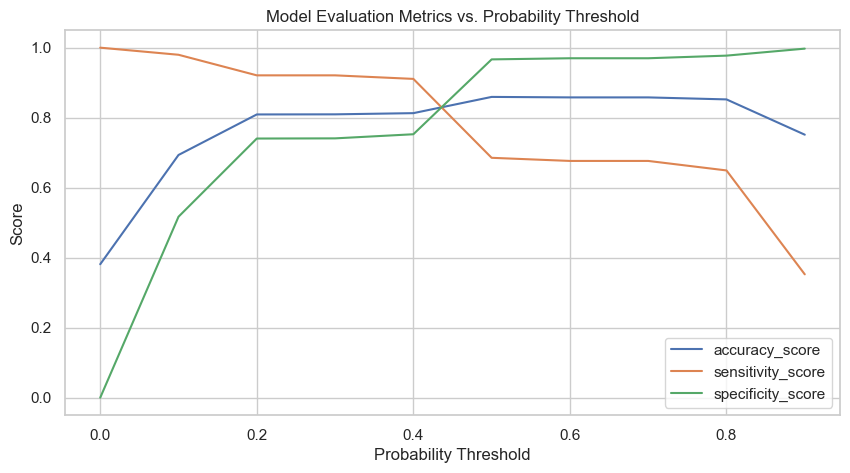

In [226]:
# Specify the x-axis and y-axis data for the plot

x = df['probability_score']
y = df[['accuracy_score', 'sensitivity_score', 'specificity_score']]

# Create a line plot
plt.figure(figsize=(10, 5))
plt.plot(x, y)
plt.xlabel('Probability Threshold')
plt.ylabel('Score')
plt.legend(y.columns)
plt.title('Model Evaluation Metrics vs. Probability Threshold')
plt.grid(True)

# Show the plot
plt.show()

Precision Recall

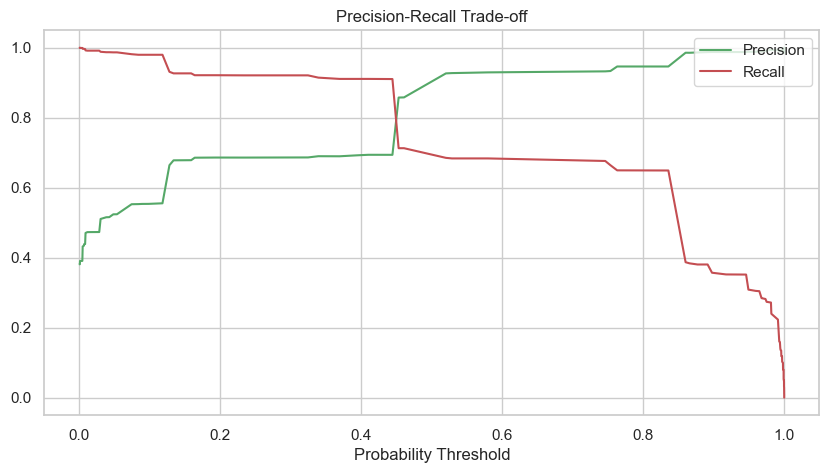

In [227]:
p, r, thresholds = precision_recall_curve(y_train_pred_final['Convert'], y_train_pred_final['Convert_Prob'])

plt.figure(figsize=(10, 5))
plt.plot(thresholds, p[:-1], "g-", label="Precision")
plt.plot(thresholds, r[:-1], "r-", label="Recall")
plt.xlabel("Probability Threshold")
plt.title("Precision-Recall Trade-off")
plt.legend(loc="upper right")
plt.grid(True)
plt.show()

In [228]:
y_train_pred_final = y_train_pred_final.iloc[:, :3]
y_train_pred_final['Convert_predicted'] = y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.27 else 0)

y_train_pred_final['Lead_Score'] = y_train_pred_final.Convert_Prob.map(lambda x: round(x*100))
y_train_pred_final.head()

,Convert,Convert_Prob,Pros_ID,Convert_predicted,Lead_Score
0,0,0.008910,1871,0,1
1,0,0.444583,6795,1,44
2,0,0.008910,3516,0,1
3,0,0.054064,8105,0,5
4,0,0.118570,3934,0,12


In [229]:
y_true = y_train_pred_final['Convert']
y_predicted = y_train_pred_final['Convert_predicted']

confusion = confusion_matrix(y_true, y_predicted)

# Extract values from the confusion matrix
TN, FP, FN, TP = confusion.ravel()

accuracy = metrics.accuracy_score(y_true, y_predicted)
precision = precision_score(y_true, y_predicted)
recall = metrics.recall_score(y_true, y_predicted)

print("Confusion Matrix:\n", confusion)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Confusion Matrix:
 [[2965 1037]
 [ 195 2271]]
Accuracy: 0.8095238095238095
Precision: 0.6865175332527207
Recall: 0.9209245742092458


In [230]:
# Getting the predicted values on the train set
x_test_sm = sm.add_constant(x_test[col])
y_test_pred = res.predict(x_test_sm)

y_test_df = pd.DataFrame(y_test)
y_test_pred_df = pd.DataFrame(y_test_pred, columns=["Converting_Probability"])
y_test_df['Prospect ID'] = y_test_df.index

y_predicted_final = pd.concat([y_test_df.reset_index(drop=True), y_test_pred_df.reset_index(drop=True)],axis=1)
y_predicted_final['final_predicted'] = y_predicted_final.Converting_Probability.map(lambda x: 1 if x > 0.27 else 0)
y_predicted_final['Lead_Score'] = y_predicted_final.Converting_Probability.map(lambda x: round(x*100))

y_predicted_final.head()

,Converted,Prospect ID,Converting_Probability,final_predicted,Lead_Score
0,1,4269,0.835771,1,84
1,1,2376,0.981198,1,98
2,1,7766,0.945951,1,95
3,0,9199,0.004983,0,0
4,1,4359,0.891403,1,89


In [231]:
def evaluate_model(y_true, y_predicted, print_score=False):
    confusion = metrics.confusion_matrix(y_true, y_predicted)
    TP, TN, FP, FN = confusion[1, 1], confusion[0, 0], confusion[0, 1], confusion[1, 0]

    accuracy_score = metrics.accuracy_score(y_true, y_predicted)
    sensitivity_score = TP / (TP + FN)
    specificity_score = TN / (TN + FP)
    precision_score = metrics.precision_score(y_true, y_predicted)

    if print_score:
        print("Confusion Matrix:\n", confusion)
        print("Accuracy:", accuracy_score)
        print("Sensitivity:", sensitivity_score)
        print("Specificity:", specificity_score)
        print("Precision:", precision_score)

    return accuracy_score, sensitivity_score, specificity_score, precision_score

evaluate_model(y_predicted_final.Converted, y_predicted_final.final_predicted, print_score=True)

Confusion Matrix:
 [[1226  451]
 [  88 1007]]
Accuracy: 0.8055555555555556
Sensitivity: 0.919634703196347
Specificity: 0.731067382230173
Precision: 0.6906721536351166


(0.8055555555555556, 0.919634703196347, 0.731067382230173, 0.6906721536351166)

Final Model

In [232]:
def build_model_cutoff(X_train, y_train, X_test, y_test, cutoff=0.5):
    
    # Train model
    X_train_sm = sm.add_constant(X_train)
    logm = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
    res = logm.fit()

    y_train_pred = res.predict(X_train_sm).values.reshape(-1)
    
    y_train_pred_final = pd.DataFrame({'Prospect ID':y_train.index, 'Converted':y_train.values, 'Convert_Probability':y_train_pred})
    y_train_pred_final['Convert_predicted'] = y_train_pred_final.Convert_Probability.map(lambda x: 1 if x > cutoff else 0)
    y_train_pred_final['Lead_Score'] = y_train_pred_final.Convert_Probability.map(lambda x: round(x*100))
    print("Result of training data:")
    print(y_train_pred_final.head())
    
    # Predicting Lead Score on Test data
    X_test_sm = sm.add_constant(X_test)
    y_test_pred = res.predict(X_test_sm)

    y_test_pred_final = pd.DataFrame({'Prospect ID':y_test.index, 'Converted':y_test.values, 'Convert_Probability':y_test_pred})
    y_test_pred_final['Convert_predicted'] = y_test_pred_final.Convert_Probability.map(lambda x: 1 if x > cutoff else 0)
    y_test_pred_final['Lead_Score'] = y_test_pred_final.Convert_Probability.map(lambda x: round(x*100))
    y_test_pred_final.reset_index(inplace=True, drop=True)
    print("Result of test data:")
    print(y_test_pred_final.head())
    
    print("Model Evaluation Metrics:")
    evaluate_model(y_test_pred_final.Converted, y_test_pred_final.Convert_predicted, print_score=True)
    
    return y_test_pred_final

In [233]:
build_model_cutoff(x_train[col], y_train, x_test[col], y_test, cutoff=0.44)

Result of training data:
   Prospect ID  Converted  Convert_Probability  Convert_predicted  Lead_Score
0         1871          0             0.008910                  0           1
1         6795          0             0.444583                  1          44
2         3516          0             0.008910                  0           1
3         8105          0             0.054064                  0           5
4         3934          0             0.118570                  0          12
Result of test data:
   Prospect ID  Converted  Convert_Probability  Convert_predicted  Lead_Score
0         4269          1             0.835771                  1          84
1         2376          1             0.981198                  1          98
2         7766          1             0.945951                  1          95
3         9199          0             0.004983                  0           0
4         4359          1             0.891403                  1          89
Model Evaluation M

,Prospect ID,Converted,Convert_Probability,Convert_predicted,Lead_Score
0,4269,1,0.835771,1,84
1,2376,1,0.981198,1,98
2,7766,1,0.945951,1,95
3,9199,0,0.004983,0,0
4,4359,1,0.891403,1,89
...,...,...,...,...,...
2767,8649,0,0.444583,1,44
2768,2152,1,0.981198,1,98
2769,7101,0,0.028934,0,3
2770,5331,0,0.118570,0,12


In [234]:
def print_model_summary(final_model, selected_features):
    print("Features used in Final Model:", selected_features)
    print("Feature Importance:")
    print(final_model.params)

# Call the function with the final model (res) and selected features (col)
print_model_summary(res, col)


Features used in Final Model: Index(['Lead_Origin_Lead Add Form', 'Lead_Source_Welingak Website',
       'Last_Activity_Others', 'Last_Activity_SMS Sent',
       'What_is_your_current_occupation_Working Professional', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Interested in Next batch',
       'Tags_Lateral student', 'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_switched off',
       'Last_Notable_Activity_Modified',
       'Last_Notable_Activity_Olark Chat Conversation'],
      dtype='object')
Feature Importance:
const                                                   -3.513367
Lead_Origin_Lead Add Form                                2.327731
Lead_Source_Welingak Website                             1.495230
Last_Activity_Others                                     2.087604
Last_Activity_SMS Sent                                   1.849674
What_is_your_current_occupation_Working Professional     3.084874
Tags_Busy                 

Conclusion:

- The Final Logistic Regression Model is built with 15 features.

- The logistic regression model is used here to predict the probability of the lead getting converted.

- The variables which contributed more to the probability of a lead getting converted are Tags_Lateral_Student (25.341666), Tags_Interested in Next Batch (23.963674) and Tags_Closed by Horizzon (9.282032).

- Accuracy of the final model is 80.6%

- Sensitivity of the final model is 90.7%

- Specificity of the final model is 74.6%

- Precision of the final model is 69%

The model built has a prediction of 90.7% conversion rate.

Recommendations:
- Leads spending more time on the website tend to convert. So it is better to make the leads spend more time on the website so that they get converted and to do that
we can make the website more user friendly and more engaging.

- Working Professional leads are the main concern as they convert more than compared to other type of leads. So it is recommended to increase the number of Working professional leads.

- Leads those who open the Email have a better probability of getting converted. So focus more on the leads that have opened the EMail.

- Increase the number of leads from Lead Add Form as they get converted easily.
